Bluring

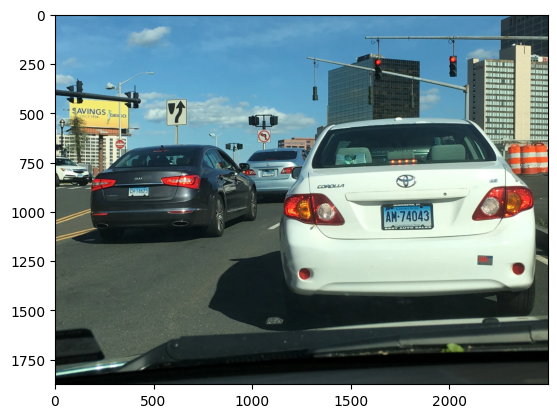

In [2]:
import cv2
import numpy as np 
from IPython.display import Image
import matplotlib.pyplot as plt

img_main = cv2.imread("cars+1.webp")
img_main_rgb = img_main[:,:,::-1]
plt.imshow(img_main_rgb)

Crop

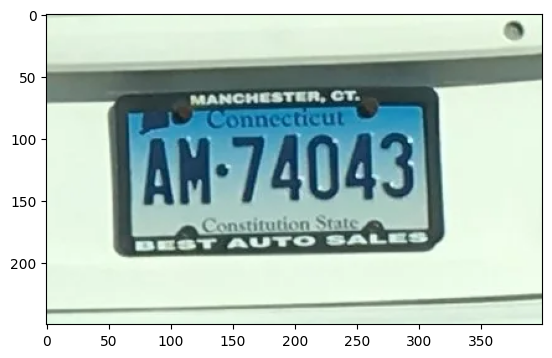

In [3]:
img = img_main_rgb[900:1150, 1600:2000]
plt.imshow(img)

Add Salt & Pepper Noise

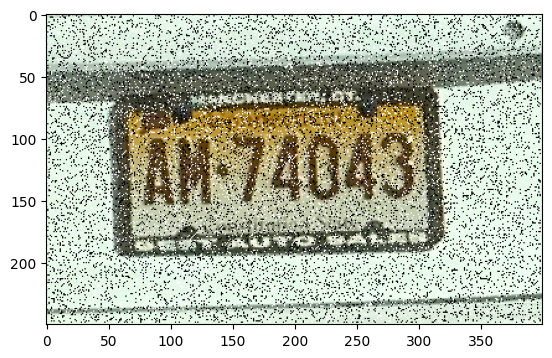

In [4]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Salt Noise (white pixels)
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Pepper Noise (black pixels)
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

salt_prob = 0.04
pepper_prob = 0.04 
noisy_sp_image = add_salt_and_pepper_noise(img, salt_prob, pepper_prob)


plt.imshow(noisy_sp_image[:,:,::-1])

Different Kinds of Bluring

Text(0.5, 1.0, 'bilateralFilter')

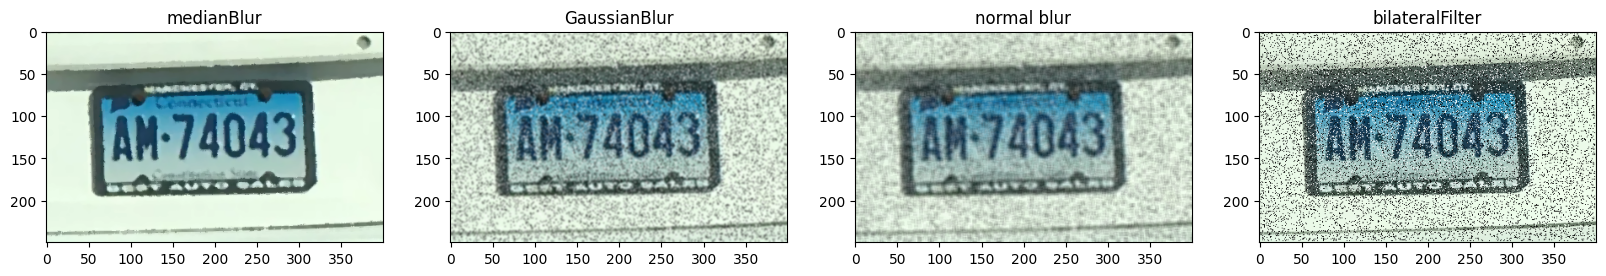

In [5]:
median_sp_blurred = cv2.medianBlur(noisy_sp_image, 5)  

gaussian_sp_blurred = cv2.GaussianBlur(noisy_sp_image, (5, 5), 0)  

blurred_sp = cv2.blur(noisy_sp_image, (5, 5)) 

bilateral_sp_blurred = cv2.bilateralFilter(noisy_sp_image, 21, 75, 75)  

plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(median_sp_blurred); plt.title("medianBlur")
plt.subplot(142); plt.imshow(gaussian_sp_blurred); plt.title("GaussianBlur")
plt.subplot(143); plt.imshow(blurred_sp); plt.title("normal blur")
plt.subplot(144); plt.imshow(bilateral_sp_blurred); plt.title("bilateralFilter")

Add Gaussian Noise 

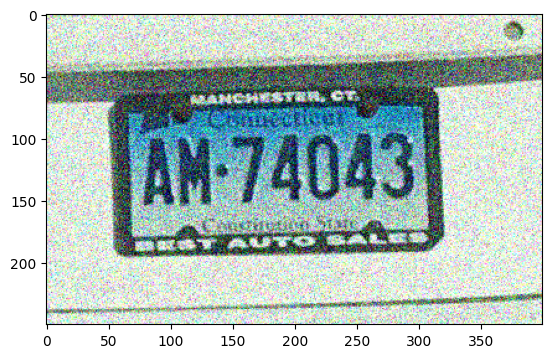

In [7]:
def add_gaussian_noise(image, mean=0, sigma=25):
    # Generate Gaussian noise
    noise = np.random.normal(mean, sigma, image.shape).astype('float32')

    # Add the noise to the image (make sure values stay in the valid range [0, 255])
    noisy_image = cv2.add(image.astype('float32'), noise)  # Add the noise
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip the values to stay within valid range
    noisy_image = noisy_image.astype('uint8')  # Convert back to uint8

    return noisy_image

mean = 0
sigma = 50
noisy_g_image = add_gaussian_noise(img, mean, sigma)

plt.imshow(noisy_g_image)

Differnet kind of Bluring

Text(0.5, 1.0, 'bilateralFilter')

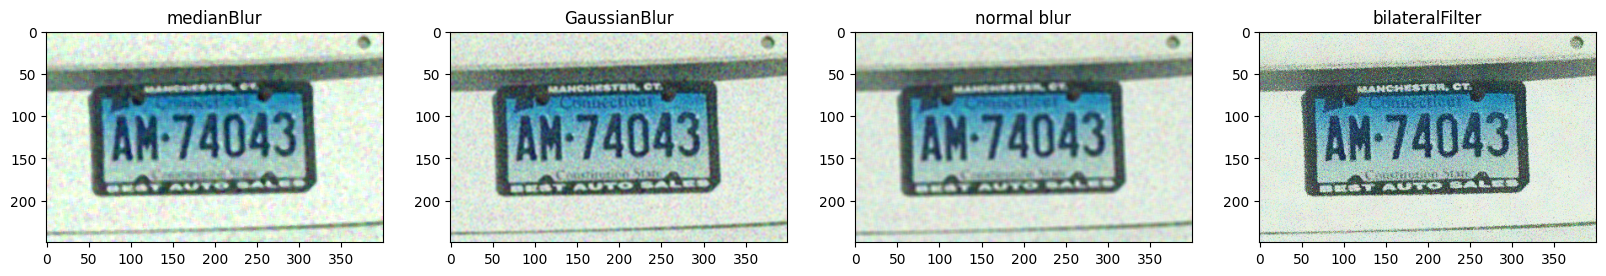

In [8]:
median_g_blurred = cv2.medianBlur(noisy_g_image, 5)  

gaussian_g_blurred = cv2.GaussianBlur(noisy_g_image, (5, 5), 0)  

blurred_g = cv2.blur(noisy_g_image, (5, 5)) 

bilateral_g_blurred = cv2.bilateralFilter(noisy_g_image, 23, 75, 75)  

plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(median_g_blurred); plt.title("medianBlur")
plt.subplot(142); plt.imshow(gaussian_g_blurred); plt.title("GaussianBlur")
plt.subplot(143); plt.imshow(blurred_g); plt.title("normal blur")
plt.subplot(144); plt.imshow(bilateral_g_blurred); plt.title("bilateralFilter")